# 🌟 Simple Word Embeddings Tutorial

This notebook gives you a **simple and clear introduction** to word embeddings with both **theory** and **small code examples**.

## 🔹 What are Word Embeddings?
- Words are usually represented as text, but computers work with numbers.
- One way is **One-Hot Encoding** (a long vector with a single `1` and rest `0`).
- Problem: one-hot doesn’t show similarity (e.g., *king* and *queen* look unrelated).

👉 **Word Embeddings** solve this by mapping words into a **dense vector space** where:
- Similar words are close together (small distance).
- Relations can be captured as vector operations.

## 🔹 One-Hot Encoding Example

In [1]:

import numpy as np

vocab = ["king","queen","man","woman"]
v2i = {w:i for i,w in enumerate(vocab)}

def one_hot(word):
    vec = np.zeros(len(vocab))
    vec[v2i[word]] = 1
    return vec

for w in vocab:
    print(w, one_hot(w))


king [1. 0. 0. 0.]
queen [0. 1. 0. 0.]
man [0. 0. 1. 0.]
woman [0. 0. 0. 1.]


In [3]:
%pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 15.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.1 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
opencv-contrib-

## 🔹 Word2Vec (Skip-gram)
We will train a **Word2Vec model** on a small toy dataset.

**Key ideas:**
- `vector_size=50`: dimension of embeddings.
- `window=3`: context window (how many words around).
- `sg=1`: use Skip-gram model.
- `epochs=100`: training iterations.

In [1]:

from gensim.models import Word2Vec

# Small toy corpus
sentences = [
    ["machine", "learning", "is", "fun"],
    ["deep", "learning", "is", "part", "of", "machine", "learning"],
    ["word", "embeddings", "capture", "meaning"],
    ["python", "is", "good", "for", "data", "science"],
    ["dogs", "and", "cats", "are", "animals"]
]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=50, window=3, sg=1, min_count=1, epochs=100)

print("✅ Model trained!")
print("Vocabulary learned:", list(model.wv.index_to_key))


✅ Model trained!
Vocabulary learned: ['learning', 'is', 'machine', 'capture', 'fun', 'deep', 'part', 'of', 'word', 'embeddings', 'animals', 'are', 'python', 'good', 'for', 'data', 'science', 'dogs', 'and', 'cats', 'meaning']


## 🔹 Explore Embeddings

In [2]:

# Vector for a word
print("Vector for 'machine':")
print(model.wv['machine'][:10])  # First 10 dimensions

# Similar words
print("\nMost similar to 'machine':")
print(model.wv.most_similar('machine', topn=3))


Vector for 'machine':
[-0.01735396  0.00739039  0.01035547  0.01146773  0.01485122 -0.01251868
  0.00223522  0.01215477 -0.0057764  -0.0125055 ]

Most similar to 'machine':
[('and', 0.19656218588352203), ('fun', 0.16703037917613983), ('are', 0.15817426145076752)]


## 🔹 Visualizing Embeddings in 2D
We use **PCA** to reduce 50 dimensions to 2D and plot them.

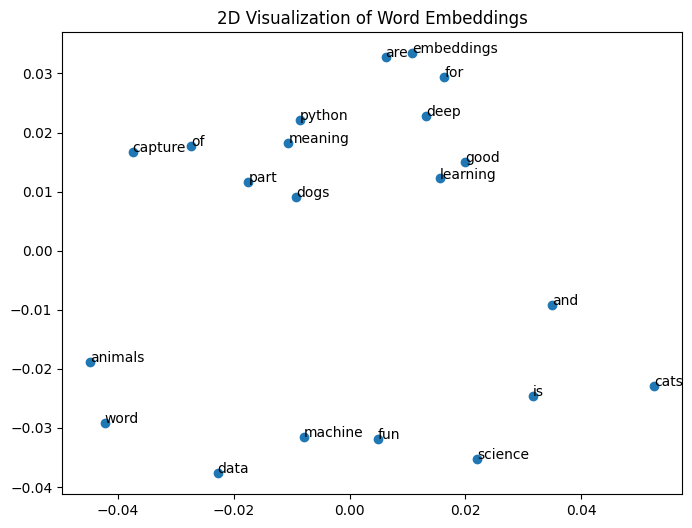

In [3]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

words = list(model.wv.index_to_key)
X = model.wv[words]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0], X_pca[i,1]))

plt.title("2D Visualization of Word Embeddings")
plt.show()


## ✅ Summary
- **One-hot encoding** is simple but does not capture meaning.
- **Word embeddings** place words in a vector space where similar words are close.
- **Word2Vec** is a popular algorithm (Skip-gram / CBOW).
- You can explore embeddings using similarity and visualization.

👉 For real projects, use **pre-trained embeddings** (GloVe, fastText, BERT) trained on huge corpora.